## 1. Creating a keras model
You've learned the theory of [back-propagation](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Deep%20Learning/Introduction%20to%20Deep%20Learning/Optimizing%20a%20NN%20with%20backward%20propagation.ipynb), which is core to understanding `deep learning`. Now you'll learn how to create and optimize these networks using the Keras interface to the TensorFlow deep learning library.

In [1]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

#### Model building steps
The Keras workflow has 4 steps. 
- First, you **specify the architecture**, which is things like: how many layers do you want? how many nodes in each layer? What activation function do you want to use in each layer? 
- Next, you **compile** the model. This specifies the loss function, and some details about how optimization works. 
- Then, you **fit** the model. Which is that cycle of back-propagation and optimization of model weights with your data. 
- Finally, you will want to use your model to **make predictions**. We'll go through these steps sequentially. 

In [2]:
n_cols = 3
model = Sequential()
model.add( Dense( 100, activation = 'relu', input_shape = (n_cols, ) ) )
model.add( Dense( 100, activation = 'relu' ) )
model.add( Dense(1) )

#### Model specification
- The variable `n_cols` is the number of `input_features`. We always need to specify how many columns are in the input when building a keras model, because that is the number of nodes in the input layer.
- We then start building the model. The first line of model specification is model equals `Sequential`. There are 2 ways to build up a model, and we will **focus on** `sequential`, which is the **easier** way to build a model. 
- `Sequential models` **require** that each `layer` has `weights` or `connections` only to the `one layer` coming directly after it in the network diagram. There are more exotic models out there with complex patterns of connections, but `Sequential` will do the trick for everything we need here. 
- We start `adding layers` using the `add method` of the `model`. 
- The `type of layer` you have seen, that standard layer type, is called a `Dense` layer. It is called `Dense` because *all of the `nodes` in the previous layer connect to all of the nodes in the current layer*. 

As you advance in deep learning, you may start using layers that aren't `Dense`. 

In each `layer`, we specify 
- the `number of nodes` as the first positional argument, and 
- the `activation function` we want to use in that layer using the keyword argument activation. 

`Keras` supports every `activation function` you will want in practice. In the first layer, we need to specify input shapes as shown here. That says the `input` will have `n_cols` columns, and there is nothing after the `comma (,)`, *meaning it can have any number of rows, that is, any number of data points*. 

You'll notice the `last layer` has `1 node`. That is the **output layer**, and it matches those diagrams where we ended with only a `single node` as the `output` or `prediction` of the model. 

This model has `2 hidden layers`, and an output layer. You may be struck that each hidden layers has 100 nodes. 

`Keras` and `TensorFlow` do the math for us, so don't feel afraid to use much bigger networks than we've seen before. It's quite common to use 100 or 1000s nodes in a layer. 

You'll learn more about choosing an appropriate number of nodes later.

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________


### 1.2. PRACTICES
#### Exercise 1.2.1. Understanding your data
You will soon start building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.

The data is pre-loaded into a pandas DataFrame called `df`. Use the `.head()` and `.describe()` methods in the IPython Shell for a quick overview of the DataFrame.

In [4]:
import pandas as pd
df = pd.read_table(r"../input/dl-dataset/hourly_wages.txt", sep = ',')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [5]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The target variable you'll be predicting is wage_per_hour. Some of the predictor variables are binary indicators, where a value of 1 represents True, and 0 represents False.

Of the 9 predictor variables in the DataFrame, how many are binary indicators? The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there?
#### Answers.
There are 6 binary-features: `"union", "female", "marr", "south", "manufacturing"` and `"construction".`

#### Exercise 1.2.2. Specifying a model
Now you'll get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.

As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called df. For convenience, everything in df except for the target has been converted to a NumPy matrix called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.

For all exercises in this chapter, we've imported the Sequential model constructor, the Dense layer constructor, and pandas.
#### SOLUTION

In [6]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
predictors = df.iloc[:, 1:].to_numpy()
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, # 50 units, 
                activation='relu', 
                input_shape=(n_cols, )))

# Add the second layer with 32 units only
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1))

## 2. Compiling and fitting a model
### 2.1. Theory.
After you've specified a model, the next task is to compile it, which sets up the network for optimization, for instance creating an internal function to do back-propagation efficiently. 

#### Why you need to compile your model
The compile methods has two important arguments for you to choose. 
- The first is **what optimizer to use**, which `controls the learning rate`. 

> In practice, the right choice of `learning rate` can make a big difference for how quickly our model finds good `weights`, and even how good a set of `weights` it can find. 

> There are a few algorithms that automatically tune the learning rate. Even many experts in the field don't know all the details of all the optimization algorithms. So the pragmatic approach is to choose a versatile algorithm and use that for most problems. Adam is an excellent choice as your go-to optimizer. 

> Adam adjusts the learning rate as it does `gradient descent`, to ensure reasonable values throughout the weight optimization process. 

- The second thing you **specify** is the **loss function**. 

> `Mean squared error` is the most common choice for regression problems. When we use keras for classification, you will learn a new default metric.

#### Compiling a model
Here is an example of the code to compile a model. It builds a model, as you've already seen, and then we add a compile command after building the model.

In [7]:
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1))

# compile
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

#### What is fitting a model
After compiling the model, you can fit it. 
- That is applying `back-propagation` and `gradient descent` with your data to *update the weights*. The fit step looks similar to what you've seen in scikit-learn, though it has more options which we will explore soon. 
- Even with the `Adam optimizer`, which is pretty smart, it can *improve your optimization process* if you **scale all the data so each feature** is, on average, about similar sized values. 

>> One common approach is to subtract each feature by that features mean, and divide it by it's standard deviation.

#### Fitting a model
You can see what the code looks like here.

In [8]:
target = df.iloc[:, 0].to_numpy()
model.fit(predictors, target)

17/17 [==============================] - 1s 2ms/step - loss: 37.9851


After the compile step, we run fit, with the predictors as the first argument. When you run this, you will see some output showing the optimizations progress as it fits the data. 
### 2.2. PRACTICES
#### Exercise 2.2.1. Compiling the model
You're now going to compile the model you specified earlier. 

To compile the model, you need to specify the optimizer and loss function to use. 

You can read more about it as well as other keras optimizers [here](https://keras.io/api/optimizers/#adam), and if you are really curious to learn more, you can read the [original paper](https://arxiv.org/abs/1412.6980v8) that introduced the `Adam optimizer`.
#### SOLUTION

In [9]:
# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


#### Exercise 2.2.2. Fitting the model
You're at the most fun part. You'll now fit the model. 

Recall that the data to be used as predictive features is loaded in a `NumPy` matrix called predictors and the data to be predicted is stored in a `NumPy` matrix called `target`. Your model is pre-written and it has been compiled with the code from the `previous exercise`.
#### SOLUTION.

In [10]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target, epochs=10)

Epoch 1/10
17/17 [==============================] - 0s 1ms/step - loss: 75.7845
Epoch 2/10
17/17 [==============================] - 0s 1ms/step - loss: 34.1081
Epoch 3/10
17/17 [==============================] - 0s 1ms/step - loss: 28.1908
Epoch 4/10
17/17 [==============================] - 0s 1ms/step - loss: 25.1725
Epoch 5/10
17/17 [==============================] - 0s 1ms/step - loss: 25.6507
Epoch 6/10
17/17 [==============================] - 0s 1ms/step - loss: 23.6342
Epoch 7/10
17/17 [==============================] - 0s 1ms/step - loss: 20.6900
Epoch 8/10
17/17 [==============================] - 0s 1ms/step - loss: 23.3501
Epoch 9/10
17/17 [==============================] - 0s 1ms/step - loss: 21.8558
Epoch 10/10
17/17 [==============================] - 0s 1ms/step - loss: 21.2631


## 3. Classification models
### 3.1. Theory.
So far we have focused on regression models. But deep learning works similarly for classification, that is for predicting outcomes from a set of discrete options.

#### Classification
For classification, you do a couple of things differently. 
- The biggest changes are: set the `loss function` as `'categorical_crossentropy'` **instead of** `'mean_squared_error'`. This isn't the only possible loss function for classification problems, but it is by far the most common. You may have heard of this before under the name `LogLoss`.

>> We won't go into the mathematics of `categorical crossentropy` here. 

>> For `categorical crossentropy loss function`, a *lower score is better*. But it's still hard to interpret. So I've added this argument "metrics equals accuracy". This means I want to print out the accuracy score at the end of each epoch, which makes it easier to see and understand the models progress. 

- Second you need to modify the `last layer`, so it has a separate node for each potential outcome. You will also change the activation function to `softmax`. 

>> The `softmax activation` function *ensures the predictions sum to 1, so they can be interpreted like probabilities*.

#### Quick look at the data
Here is some data for a binary classification problem.

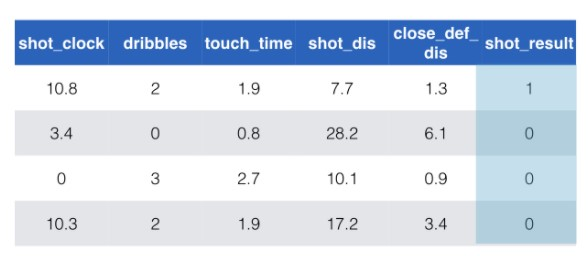

In [11]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

We have data from the `NBA basketball league`. 
- It includes facts about each shot, and the shot result is either 0 or 1, indicating whether the shot went in or not. 
- The `outcome` here is in a single column, which is not uncommon. 

But in general, we'll want to convert `categoricals in Keras` to a format with a separate column for each output. 

`Keras` includes a function to do that, which you will see in the code soon. This setup is consistent with the fact that your model will have a separate node in the output for each possible class.

#### Transforming to categorical
We have a new column for each value of `shot_result`. 

A `1` in any column indicates that this column corresponds to the value from the original data. This is sometimes called `one-hot encoding`. 

>> If the original data had `3` or `4` or `100 different values`, the new array for our data would have `3 or 4 or 100 columns respectively`.

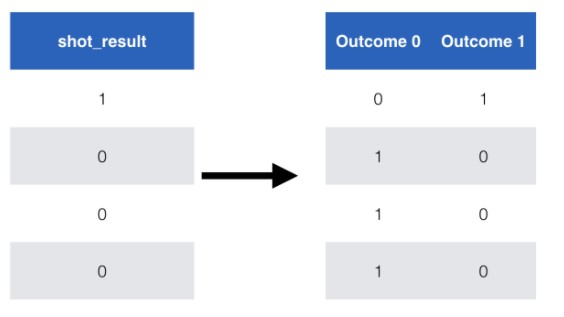

In [12]:
## Hình minh họa Image(fig1, height, width)

#### Classification
Here is the code to build a model with that data. 

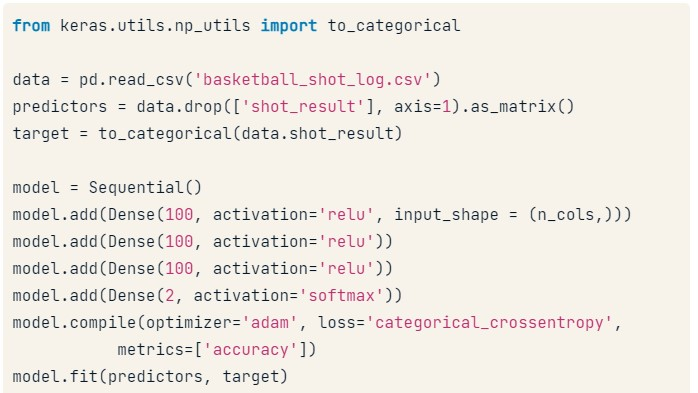

In [13]:
## Hình minh họa Image(fig1, height, width)

- First, we import that utility function to convert the data from one column to multiple columns. That is this function `to_categorical`. 
- We then read in the data. I like reading in the data with pandas, in case I want to inspect it. But this could be done with numpy. I also do a couple of pandas tricks here which you may or may not be familiar with. Here I use the drop command to get a version of my data without the target column. 
- I then store that as a numpy matrix. And here, I use a dot notation to access the column with the prediction target. We keep all the data except the outcome in a matrix called predictors. We then create our target using the to_categorical function. 
- Then we build our model. It looks similar to models you've seen. Except the last line of the model definition has 2 nodes, for the 2 possible outcomes. And it has the softmax activation function.

Lets look at the results now.

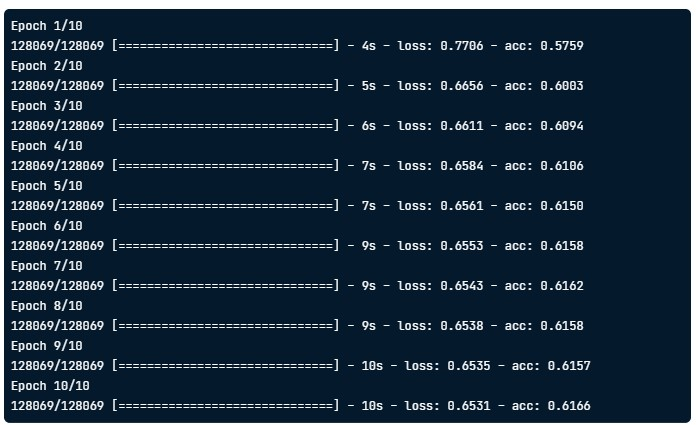

In [14]:
## Hình minh họa Image(fig1, height, width)

Both accuracy and loss improve measurably for the first 3 epochs, and then the improvement slows down. Sometimes it gets a little worse for an epoch, sometimes it gets a little better. We will soon see a more sophisticated way to determine how long to train, but training for 10 epochs got us to that flat part of the loss function, so this worked well in this case. 

### 3.2. PRACTICES
#### Exercise 3.2.1. Understanding your classification data
Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. This data is from a tutorial on data science competitions. Look at [here](https://www.kaggle.com/c/titanic/data) for descriptions of the features.

The data is pre-loaded in a pandas DataFrame called `df`.

In [15]:
df = pd.read_table(r"../input/dl-dataset/titanic.txt", sep = ',')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Use the `.describe()` method in the IPython Shell to answer this question.
#### SOLUTION

In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


Hence, the `maximum age of passengers` is 80.

#### Exercise 3.2.2. Last steps in classification models
You'll now create a classification model using the titanic dataset, which has been pre-loaded into a DataFrame called `df`. You'll take information about the passengers and predict which ones survived.

The predictive variables are stored in a NumPy array predictors. The target to predict is in `df.survived`, though you'll have to manipulate it for keras. The number of predictive features is stored in `n_cols`.

Here, you'll use the `'sgd'` optimizer, which stands for `Stochastic Gradient Descent`. You'll learn more about this in the next chapter!
#### SOLUTION.

In [17]:
from keras.utils import to_categorical

predictors = df.iloc[:, 1:].to_numpy()
predictors = np.array(predictors, dtype = 'float')
n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation = 'relu', input_shape = (n_cols, )))

# Add the output layer
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
model.fit(predictors, target, epochs = 10)

Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 2.9065 - accuracy: 0.5576
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 0.9401 - accuracy: 0.6351
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.9309 - accuracy: 0.5973
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.7085 - accuracy: 0.6892
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.6799
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.7152
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.6732
Epoch 8/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.7116
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7046
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5988 - accuracy: 0.7038


## 4. Using models
### 4.1. Theory.
Now that you can build basic deep learning models, I'll show you how to use them. Then we'll go into some finer details on fine tuning model architectures. 

####  Using models
The things you'll want to do in order to use these models are: save a model after you've trained it, reload that model, make predictions with the model.

####  Saving, reloading and using your Model
Here is the code to save a model, reload it, and make predictions.

In [18]:
from keras.models import load_model

model.save('model_file.h5')
load_md = load_model('model_file.h5')

- We've imported a load_model function here. Once I have a model I want to save, I can save it with the "save" method. I supply a filename. Models are saved in a format called hdf5, for which `h5` is the common extension.
- I then load the model back into memory with the `load_model` function here. 
- I then make predictions. The model I've loaded here is a classification model. The predictions come in the same format as the prediction target. You may recall that this had 1 column for whether the shot was missed, and then a 2nd column for whether the shot was made.

In [19]:
predictions = load_md.predict(predictors)  # you can replace predictors by your test_data (X_test)
prob_true = predictions[:, 1] 

 In practice, I probably only want the probability that the shot is made. So, I'll extract that second column with numpy indexing, and I called that `probability_true`. Lastly, sometimes I'll want to verify that the model I loaded has the same structure I expect.

#### Verifying model structure
You can print out a summary of the model architecture with the `summary method`. You can see the output here. 

In [20]:
load_md.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


Now that you can save your model, reload it, make predictions, and verify its structure, you have most of what you need to not just build models, but to work with them in practical situations

### 4.2. PRACTICES
#### Exercise. Making predictions
The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.
#### SOLUTION.

In [22]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target, epochs = 10)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# print predicted_prob_true
print('\n prob:\n', predicted_prob_true)

Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 3.2262 - accuracy: 0.5876
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 1.0750 - accuracy: 0.6508
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.6802
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.8334 - accuracy: 0.6461
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.6613
Epoch 6/10
28/28 [==============================] - 0s 979us/step - loss: 0.6261 - accuracy: 0.6604
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.7117
Epoch 8/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.7242
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.6876
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6012 - accuracy: 0.6982

 prob:
 [0.13525